In [305]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier  # For classification

from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pandas as pd

In [306]:
df = pd.read_csv('/content/Social_Network_Ads.csv')

In [307]:
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [308]:
df.isnull().sum()

,0
User ID,0
Gender,0
Age,0
EstimatedSalary,0
Purchased,0


In [309]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

df['Gender'] = label_encoder.fit_transform(df['Gender'])

df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,0,26,43000,0
3,15603246,0,27,57000,0
4,15804002,1,19,76000,0
...,...,...,...,...,...
395,15691863,0,46,41000,1
396,15706071,1,51,23000,1
397,15654296,0,50,20000,1
398,15755018,1,36,33000,0


In [310]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

df['EstimatedSalary'] = scaler.fit_transform(df[['EstimatedSalary']])

In [311]:
df = df.drop(columns=['User ID'])
df

,Gender,Age,EstimatedSalary,Purchased
0,1,19,0.029630,0
1,1,35,0.037037,0
2,0,26,0.207407,0
3,0,27,0.311111,0
4,1,19,0.451852,0
...,...,...,...,...
395,0,46,0.192593,1
396,1,51,0.059259,1
397,0,50,0.037037,1
398,1,36,0.133333,0


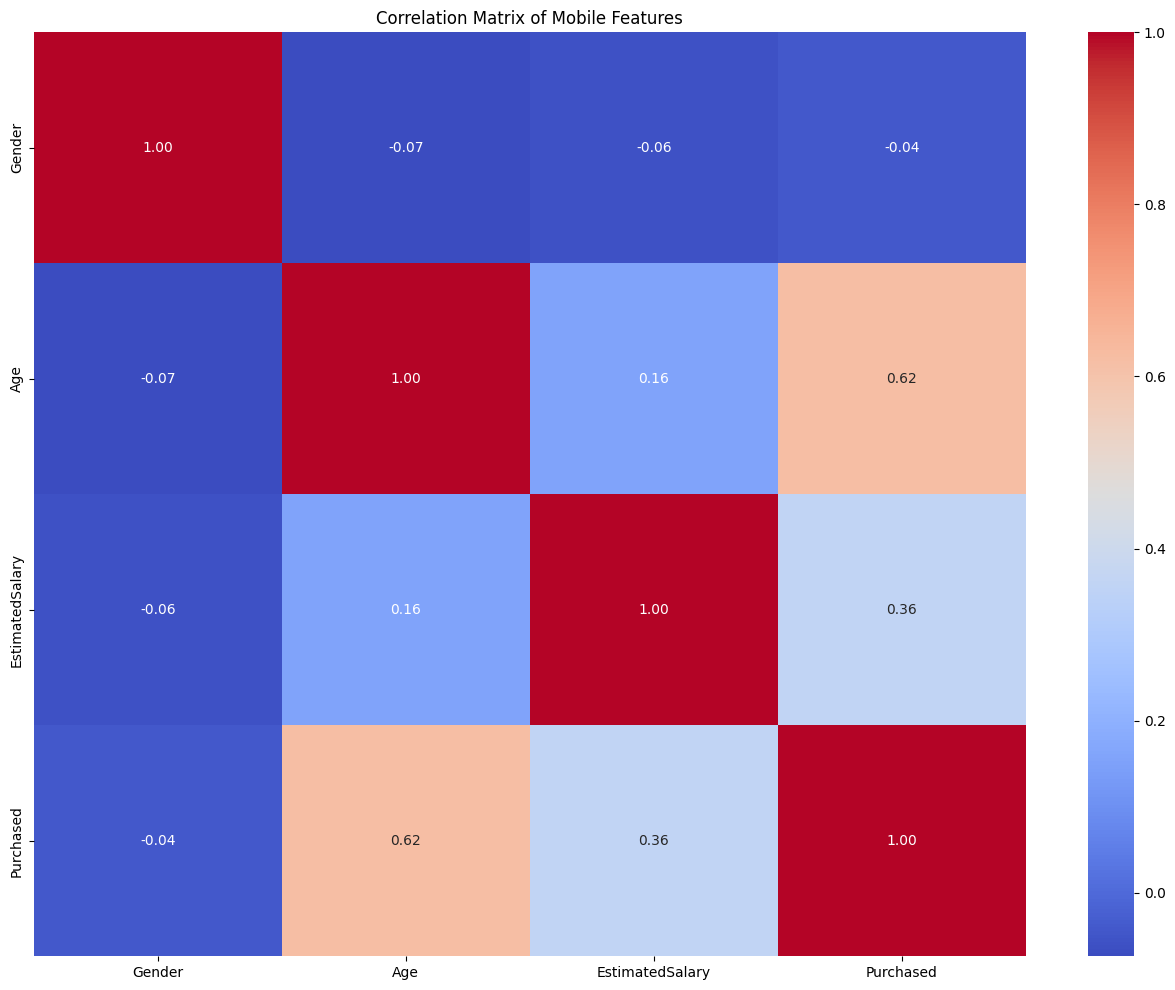

In [312]:
import matplotlib.pyplot as plt
import seaborn as sns

correlation_matrix = df.corr()

plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Mobile Features')
plt.show()

In [313]:
X = df.drop(columns=['Purchased'])
y = df['Purchased']

In [314]:
x_train , x_test, y_train, y_test = train_test_split(X ,y , test_size=0.2 ,random_state=42)
model = RandomForestClassifier(n_estimators=200, random_state=0 , criterion= 'entropy' , max_depth = 300)
model.fit(x_train,y_train)
y_pred = model.predict(x_test)


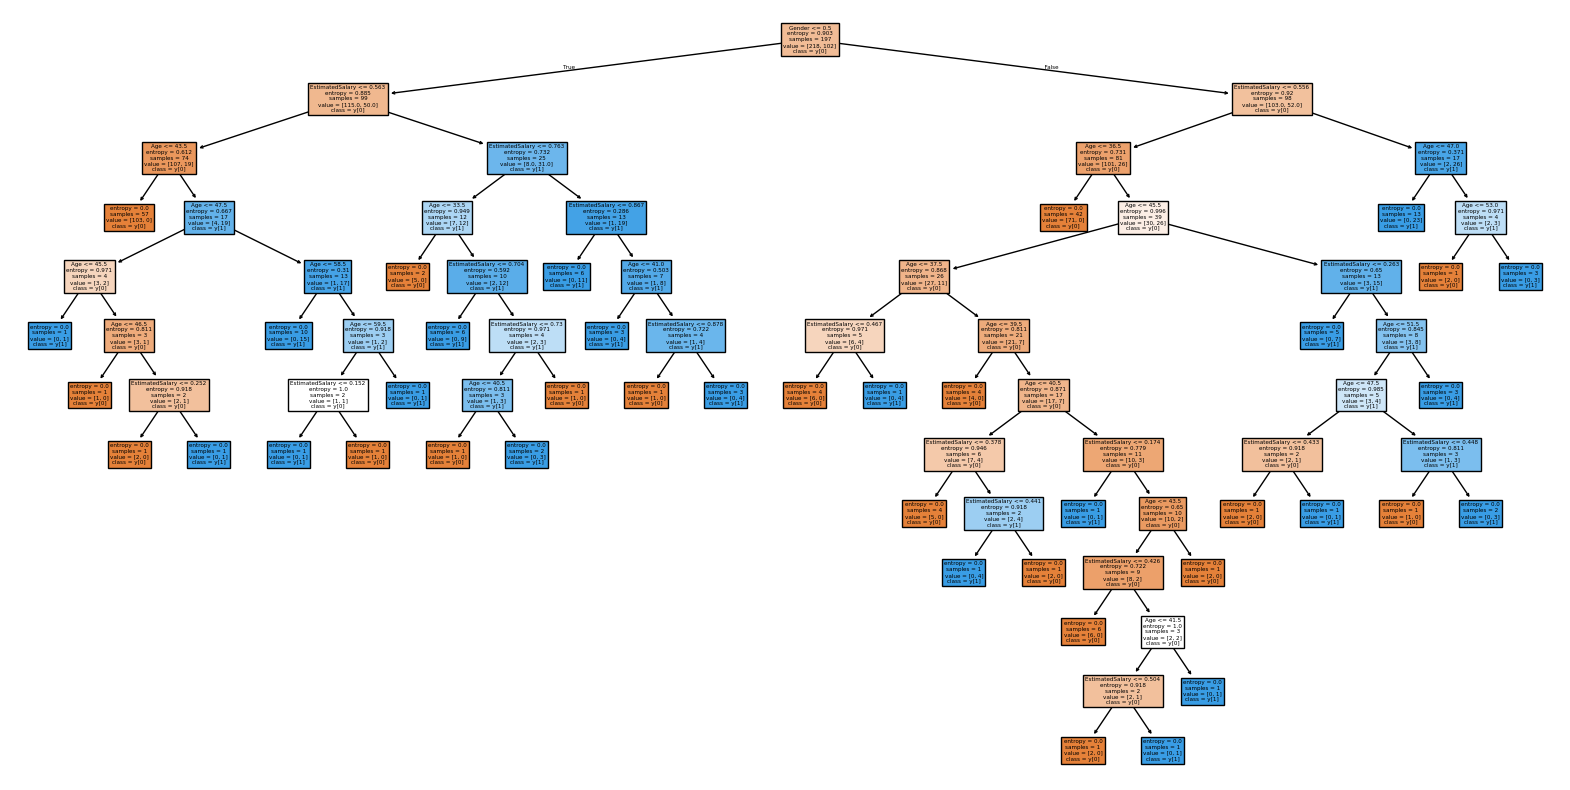

In [315]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Access one tree from the Random Forest (first tree in this case)
tree = model.estimators_[2]
# Plot the first decision tree
plt.figure(figsize=(20, 10))
plot_tree(tree, filled=True, feature_names=X.columns, class_names=True)
plt.show()


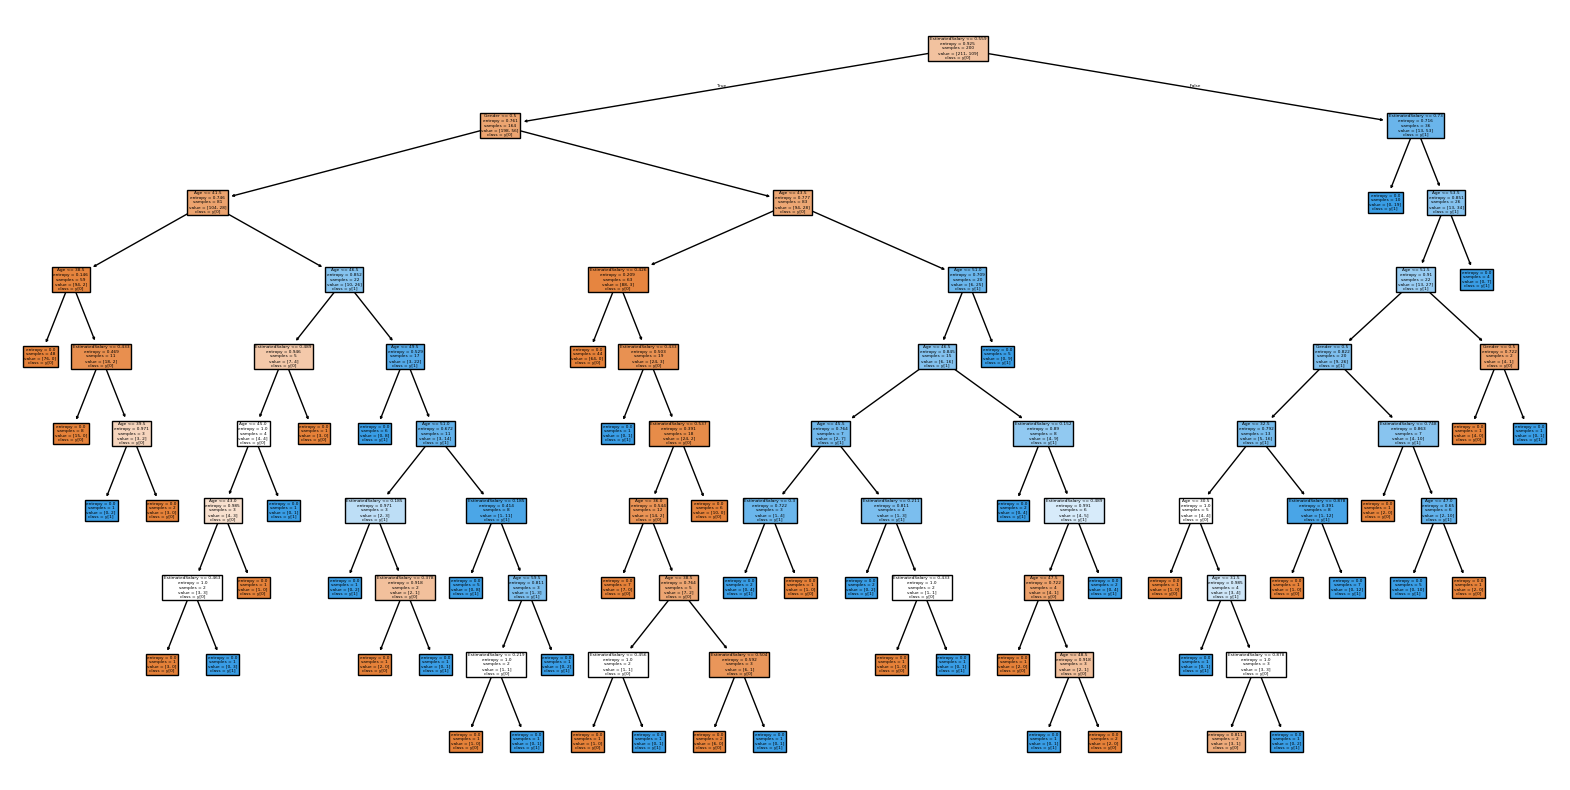

In [316]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Access one tree from the Random Forest (first tree in this case)
tree = model.estimators_[0]
# Plot the first decision tree
plt.figure(figsize=(20, 10))
plot_tree(tree, filled=True, feature_names=X.columns, class_names=True)
plt.show()


In [317]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 91.25%
